In [1]:
using Printf, DelimitedFiles

include("../pNormDiffusion.jl");

## Load graph

In [2]:
G = read_edgelist("../datasets/Colgate88_edgelist.txt", delim='\t');

## Load target cluster, i.e., students of year 2008

In [3]:
# For details about the ground-truth target cluster please refer to:
# K. Fountoulakis, D. Wang, S. Yang. p-Norm Flow Diffusion for Local Graph Clustering. ICML 2020.

target_cluster = vec(readdlm("../datasets/Colgate88_year2008.txt", ' ', Int, '\n'));

## Run p-Norm Flow Diffusion

In [4]:
seednode = 3345;
seedmass = 200000;
seedset = Dict(seednode => seedmass);

#### p = 2

In [5]:
x = pnormdiffusion(G, seedset, p=2);
cluster, cond = sweepcut(G, x);

In [6]:
pr, re, f1 = compute_f1(cluster, target_cluster)
@printf "Conductance is %.2f\n" cond
@printf "Prcision is %.2f\n" pr
@printf "Recall is %.2f\n" re
@printf "F1 score is %.2f\n" f1

Conductance is 0.29
Prcision is 0.87
Recall is 0.92
F1 score is 0.90


#### p = 4

In [7]:
x = pnormdiffusion(G, seedset, p=4);
cluster, cond = sweepcut(G, x);

In [8]:
pr, re, f1 = compute_f1(cluster, target_cluster)
@printf "Conductance is %.2f\n" cond
@printf "Prcision is %.2f\n" pr
@printf "Recall is %.2f\n" re
@printf "F1 score is %.2f\n" f1

Conductance is 0.28
Prcision is 0.90
Recall is 0.95
F1 score is 0.92


# Visualization of target cluster and local clustering results

In [9]:
using PyCall, PyPlot

nx = pyimport("networkx");
plt = pyimport("matplotlib.pyplot");

In [10]:
# Load graph to Networkx
g_nx = nx.read_edgelist("../datasets/Colgate88_edgelist.txt");

# Load pre-computed coordinates for nodes
pos = readdlm("../datasets/Colgate88_pos.txt", ' ', Float64, '\n');
pos_dict = Dict(string(i) => (xy[1],xy[2]) for (i,xy) in enumerate(eachrow(pos)));

#### Target cluster

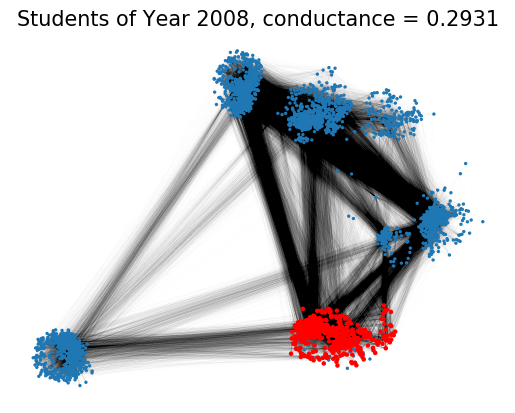

In [11]:
# Visualize students of year 2008

n1 = setdiff(Set(1:G.nv),Set(target_cluster))
nl = [string(i) for i in n1];
nc = ["tab:blue" for _ in n1];
ns = [2 for _ in n1];
for i in target_cluster
    push!(nl, string(i))
    push!(nc, "r")
    push!(ns, 5)
end

plt.subplots()
plt.axes(frameon=false)
nx.draw_networkx_nodes(g_nx, pos_dict, nodelist=nl, node_size=ns, node_color=nc)
nx.draw_networkx_edges(g_nx, pos_dict, width=0.1, edge_color="k", alpha=0.05)
plt.title("Students of Year 2008, conductance = "*@sprintf("%.4f",compute_conductance(G,target_cluster)), size=15)
plt.show()

###### Returned clusters

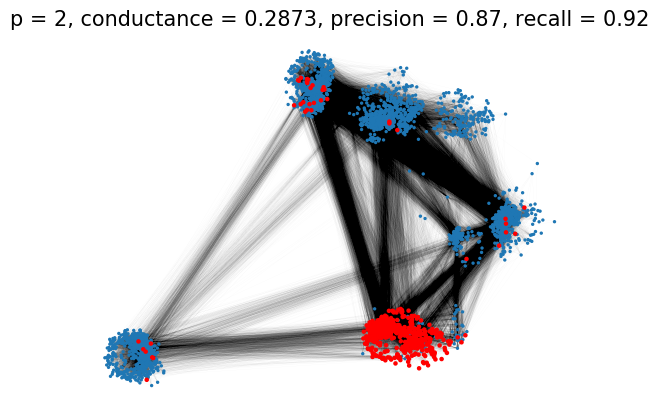

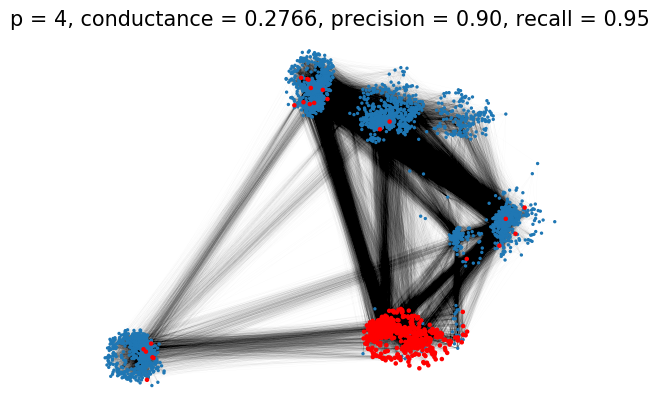

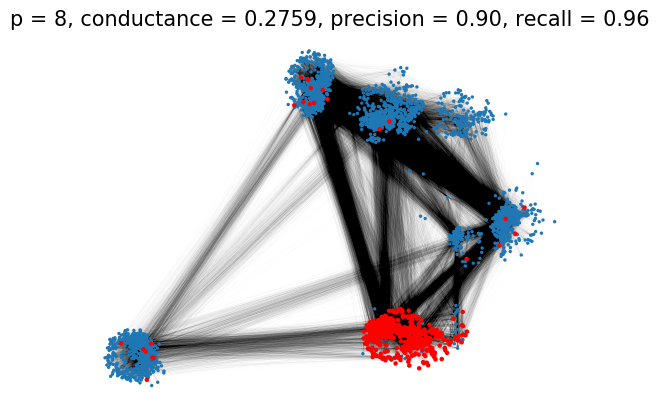

In [12]:
for p in [2,4,8]
    
    x = pnormdiffusion(G, seedset, p=p);
    cluster, cond = sweepcut(G, x);
    
    tp = length(intersect(Set(target_cluster),Set(cluster)));
    pr = tp/length(cluster);
    re = tp/length(target_cluster); 
    
    n1 = setdiff(Set(1:G.nv),Set(cluster))
    nl = [string(i) for i in n1];
    nc = ["tab:blue" for _ in n1];
    ns = [2 for _ in n1];
    for i in cluster
        push!(nl, string(i))
        push!(nc, "r")
        push!(ns, 5)
    end    
    plt.subplots()
    plt.axes(frameon=false)
    plt.title("p = "*string(p)*", conductance = "*string(round(1.0e4*cond)/1.0e4)*
        ", precision = "*@sprintf("%.2f",pr)*", recall = "*@sprintf("%.2f",re), size=15) 
    nx.draw_networkx_nodes(g_nx, pos_dict, nodelist=nl, node_size=ns, node_color=nc)
    nx.draw_networkx_edges(g_nx, pos_dict, width=0.1, edge_color="k", alpha=0.05)
    plt.show()
    
end